In [79]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.dates as mdates 
import matplotlib.cbook as cbook 
from matplotlib.axis import Axis
matplotlib.rcParams.update({'font.size': 16})

O que precisa ser feito:

- Considerar as taxas de negociação e saque(Feito)

- Considerar as outras cryptos analisadas LTC, ETH
- Fazer melhor a diferenciação entre desenvolvidos e subdesenvolvidos
- depois dividir entre High Investor Protection and Low Investor Protection
- Não considero network fees(Extremamente variável)


Hoje: 
      Dia 22/10 Adicionar as taxas de negociação e obter os dados para LTC e ETH(O maior número de países possíveis.
      
      Dia 23/10 Explicar melhor a diferenciação entre Desenvolvidos e Subdesenvolvidos, pesquisar o paper do Rafael e dividir a base entre High Investor Protection and Low Investor Protection
      
     
      
      
      

-	A diferenciação entre países desenvolvidos vs desenvolvimento foi feito usando como base o Relatório do Desenvolvimento Humano 2019


-	Todos os dados foram obtidos usando o API da cryptocompare.


-	Algumas corretoras não possuíam dados no período ou apresentam dados repetidos e, portanto, foram removidos da análise.


-	A maioria das corretoras removidas são de países desenvolvidos, no total de 10 corretoras de 6 diferentes países.


-	Apenas corretoras da Venezuela e Brasil foram removidas da base de países em desenvolvimento.


-	Fiz conversão dos dados de todas as corretoras para USD(se necessário) e Prosseguir a análise apenas no Bitcoin(Fiz isso apenas por facilidade, já que reduz o trabalho na hora de filtrar as bases).


-	Obs: É possível que os dados das corretoras removidas possam ser obtidos diretamente do Api da corretora, ainda tenho que verificar essa possibilidade. Acredito também que seja possível obter mais dados de corretoras de países em desenvolvimento que não estava listada no API da cryptocompare.




In [80]:
btc = pd.read_excel('btcs_developing_v2.xlsx',index_col='time')
btc.replace(0, np.nan, inplace=True)
btc.drop(columns=['LocalBitcoins_Venezuela_GBP','close_brazillex_btc','Bitso_Mexico_MXN','Buda_Chile_PEN'],inplace=True)


In [81]:
btc.columns

Index(['Braziliex_Brazil_BRL', 'Exmo_Russian Federation_USD',
       'BTCTurk_Turkey_TRY', 'Kuna_Ukraine_UAH', 'ChileBit_Chile_CLP',
       'VBTC_Vietnam_VND', 'close_bitcointrade_btc', 'close_bitso_btc',
       'close_cryptomarket_btc_clp', 'close_buda_btc_clp',
       'close_mercado_btc'],
      dtype='object')

In [99]:
# Renomeando colunas países desenvolvidos
# Adicionar depois uma duas corretoras africanas
# duas corretoras asiaticas

btc.columns = ['BRAZILIEX','EXMO','BTCTURK','KUNA','CHILEBIT','VBTC','BITCOINTRADE','BITSO',
              'CRYPTOMARKET','BUDA','MERCADO_BITCOIN']

In [100]:
# Taxas de Negociacao países em desenvolvimento

taxas_negociacao_des = {'MERCADO_BITCOIN':0.005,'BITCOINTRADE':0.00375,'BRAZILIEX':0.005,
         'CRYPTOMARKET':0.00535,'BUDA':0.004,'BITSO':0.00575,
        'EXMO':0.003,'BTCTURK':0.0014,'KUNA':0.0025,'CHILEBIT':0.00375,
        'VBTC':0.00375}

taxas_de_saque_des  = {'MERCADO_BITCOIN':0.0199,'BITCOINTRADE':0.01,'BRAZILIEX':0.0075,
         'CRYPTOMARKET':0,'BUDA':0,'BITSO':0,
        'EXMO':0,'BTCTURK':0,'KUNA':0,'CHILEBIT':0,
        'VBTC':0}

In [84]:
btc_2 = pd.read_excel('btcs_desenvolvidos_v2.xlsx',index_col='time')
btc_2.replace(0, np.nan, inplace=True)
btc_2.drop(columns=['CoinCorner_Isle of Man_GBP','CoinCorner_Isle of Man_EUR','Neraex_Japan_USD','Luno_Singapore_MYR','Luno_Singapore_ZAR'
                 ,'LakeBTC_United States of America_USD','Bitfinex_British Virgin Islands_USD','Bit2C_Israel_ILS',
                   'Korbit_South Korea_KRW','Bithumb_South Korea_KRW'],inplace=True)

In [85]:
# Renomeando as colunas
btc_2.columns = ['COINBASE','GEMINI','ITBIT','KRAKEN','BITBAY','BITBAY_EUR','BITLISH','BITSTAMP','COINFLOOR',
                'DSX','COINONE','UPBIT','PAYMIUM','BITFLAYER',
                ]


In [86]:
# Taxa de Negociacao e saque de países desenvolvidos.
taxa_de_negociacao = {'COINBASE':0.005,'GEMINI':0.0199,'ITBIT':0.003,
                     'KRAKEN':0.0026,'BITBAY':0.00365,'BITBAY_EUR':0.00365,
                     'BITLISH':0.0015,'BITLISH_UK':0.0015,'BITSTAMP':0.005,
                     'COINFLOOR':0.0025,'DSX':0.002,'COINONE':0.002,
                      'UPBIT':0.0025,'PAYMIUM':0.002,'BITFLAYER':0.001}


taxa_de_saque = {'COINBASE':0,'GEMINI':0,'ITBIT':0,
                     'KRAKEN':0,'BITBAY':0.0299,'BITBAY_EUR':0.0299,
                     'BITLISH':0.000005,'BITLISH_UK':0.000005,'BITSTAMP':0,
                     'COINFLOOR':0.000005,'DSX':0.000004,'COINONE':0,
                      'UPBIT':0,'PAYMIUM':0,'BITFLAYER':0.003}

In [87]:
for name in btc_2.columns:
    for key in taxa_de_negociacao.keys():
        if key in name:
            btc_2[name] = btc_2[name] - btc_2[name]*taxa_de_negociacao[key]
            
            
for name in btc.columns:
    for key in taxas_negociacao_des.keys():
        if key in name:
            btc[name] = btc[name] - btc[name]*taxas_negociacao_des[key]

In [48]:
btc_comparacao = pd.read_excel('btcs_desenvolvidos_v2.xlsx',index_col='time')


In [88]:
# Price deviations:
btc_dev = []
btc_2_dev = []

for i in range(0,btc.shape[0]):
    dev = btc.iloc[i].max() / btc.iloc[i].min()
    btc_dev.append(dev)

for i in range(0,btc_2.shape[0]):
    dev = btc_2.iloc[i].max() / btc_2.iloc[i].min()
    btc_2_dev.append(dev)

**Plot do índice de desvio de preços considerando apenas países em desenvolvimento**

- São 13 corretoras de países em desenvolvimento de 8 diferentes países, são eles:
    Indonesia,Vietnã, Rússia, Ucrânia, Turquia, México, Brasil e Chile.


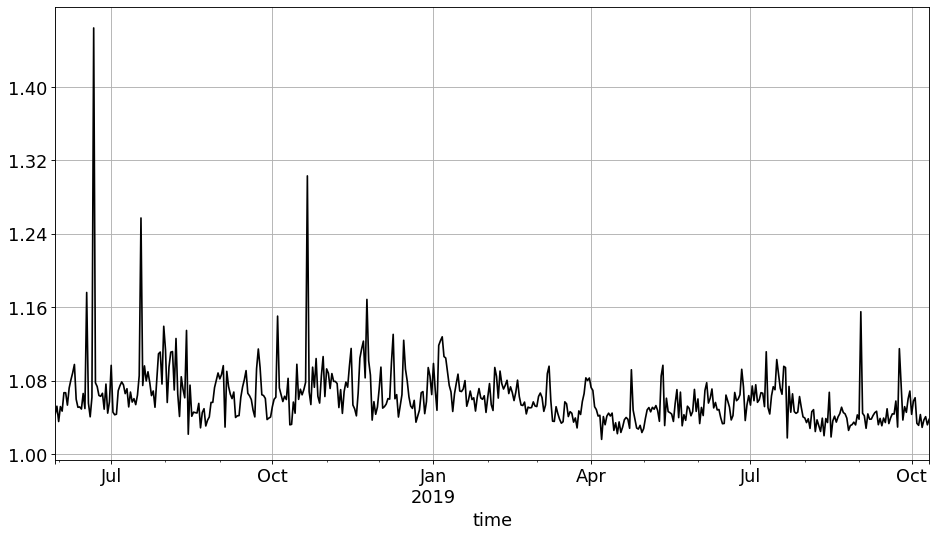

In [89]:
# Plot dos deviations BITCOIN
btc_dev = pd.DataFrame(btc_dev,index=btc.index)
fig, ax = plt.subplots(figsize=(12, 7), dpi= 80)

ticks = np.arange(1,btc_dev[0].max(),0.08).round(2)
btc_dev[0].plot(color='black')
ax.set_yticks(ticks)

plt.grid()
plt.xlabel(' ')
plt.tight_layout()

**Plot do índice de desvio de preços considerando apenas países desenvolvidos**
- São 15 corretoras de países desenvolvido de 6 diferentes países, são eles:
    Coreia do Sul, Japão, França, Malta, Reino Unido e Estados Unidos.

- Os dados das corretoras sul-coreanas são responsaveis pelo desvio alto nos preços.(Resultado esperado e linha com observado na literatura (Makarov and Schoar 2019)






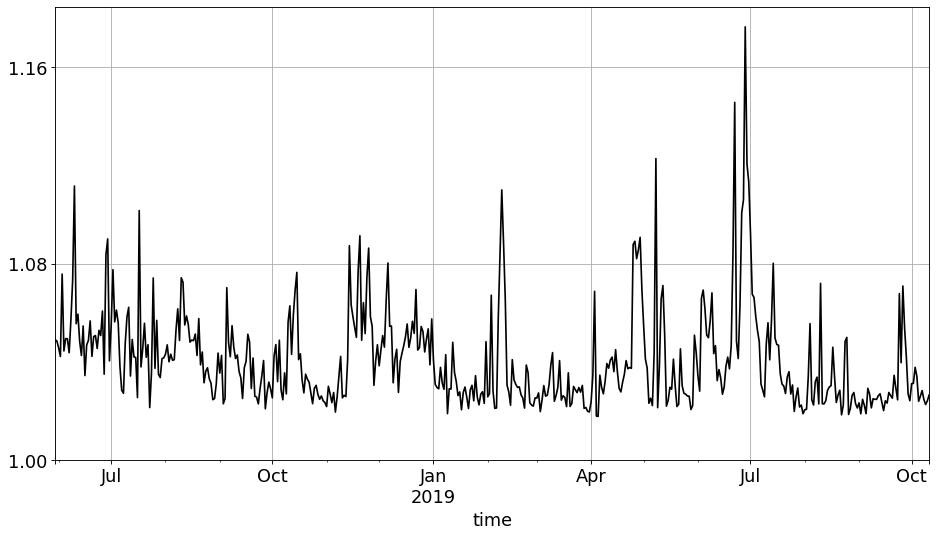

In [90]:
btc_2_dev = pd.DataFrame(btc_2_dev,index=btc_2.index)
fig, ax = plt.subplots(figsize=(12, 7), dpi= 80)

ticks = np.arange(1,btc_2_dev[0].max(),0.08).round(2)
btc_2_dev[0].plot(color='black')
ax.set_yticks(ticks)

plt.grid()
plt.xlabel(' ')

plt.tight_layout()

**Comparando os dois índices**

- O IDP dos países em desenvolvimento se mantém acima da de países desenvolvidos durante todo o período, com exceção de um
outlier que tem origem na corretora coreana Bithumb

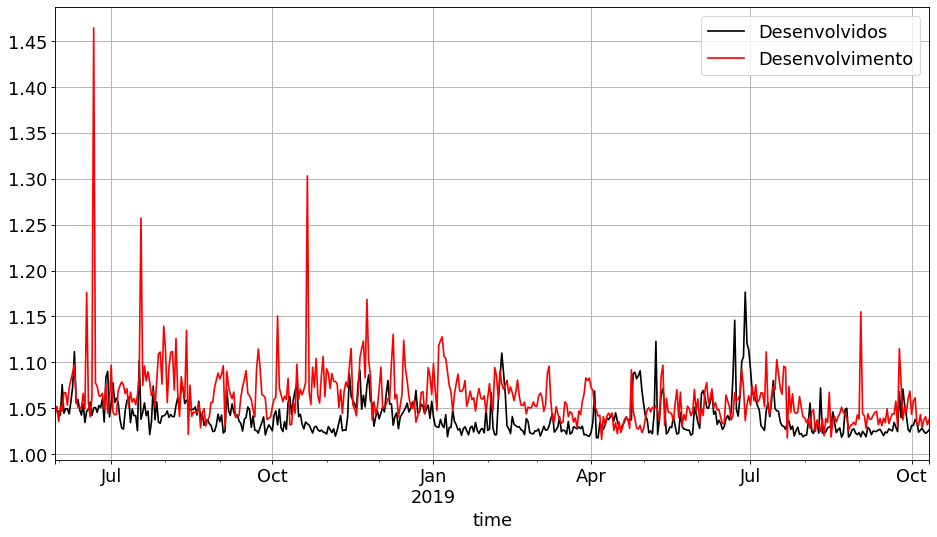

In [91]:
fig, ax = plt.subplots(figsize=(12, 7), dpi= 80)

ticks = np.arange(1,btc_dev[0].max(),0.05).round(2)
btc_2_dev[0].plot(color='black',label='Desenvolvidos')
btc_dev[0].plot(color='red',label='Desenvolvimento')
ax.set_yticks(ticks)

plt.grid()
plt.legend()
plt.xlabel(' ')

plt.tight_layout()

In [92]:
describe = pd.concat([btc_2_dev.describe().loc[['mean','std','min','50%','max']],btc_dev.describe().loc[['mean','std','min','50%','max']]],axis=1)
describe.columns = ['Desenvolvido','Em Desenvolvimento']

In [93]:
describe['Em Desenvolvimento'] = describe['Em Desenvolvimento'] 
describe['Desenvolvido'] = describe['Desenvolvido']
describe['Diferença'] = describe['Em Desenvolvimento'] - describe['Desenvolvido']

**Estatística descritivas**

In [94]:
describe.rename(index={'mean':'Média','std':'Desvio Padrão','min':'Min','50%':'Mediana','max':'Max'},inplace=True)

describe.style.set_caption('Tabela: Est Descritiva - Indice de Desvios de Preços').set_table_styles([{
    'selector': '',
    'props': [
        ('color', 'black'),
        ('font-size', '16px')
    ]
}])

,Desenvolvido,Em Desenvolvimento,Diferença
Média,1.040971,1.062022,0.021051
Desvio Padrão,0.019931,0.033081,0.013150
Min,1.017737,1.015988,-0.001749
Mediana,1.035583,1.056900,0.021317
Max,1.176508,1.464245,0.287736


**IDP em países em desenvolvimento é 3.258% maior que em países desenvolvidos**

In [101]:
amount = 1000

bought = amount/btc.iloc[0].min()
sell = (bought * btc.iloc[0].max())
sell = (sell - (sell*taxas_de_saque_des[btc.iloc[0].idxmax()]))
gain = sell - amount

for i in range(1,btc.shape[0]):

    bought = amount/btc.iloc[i].min() 
    sell = (bought * btc.iloc[i].max()) 
    sell = (sell - (sell*taxas_de_saque_des[btc.iloc[i].idxmax()]))
    gain = gain - amount + sell

print("ganho com arbitragem em btc:",gain)





ganho com arbitragem em btc: 29694.781972108314


In [58]:
amount = 1000

bought = amount/btc_2.iloc[0].min()
sell = (bought * btc_2.iloc[0].max())
sell = (sell - (sell*taxa_de_saque[btc_2.iloc[0].idxmax()]))
gain = sell - amount

for i in range(1,btc_2.shape[0]):

    bought = amount/btc_2.iloc[i].min() 
    sell = (bought * btc_2.iloc[i].max()) 
    sell = (sell - (sell*taxa_de_saque[btc_2.iloc[i].idxmax()]))
    gain = gain - amount + sell

print("ganho com arbitragem em btc_2:",gain)

ganho com arbitragem em btc_2: 19158.531228673815


**Ganho com arbitragem(países em desenvolvimento) em btc: US\$ 34.306,63**


**Ganho com arbitragem(países desenvolvidos) em btc: US\$ 16.697,82**


A disparidade no ganhos de arbitragem era esperado, considerando que IDP dos países em desenvolvimento é quase o dobro de países desenvolvidos.

In [ ]:
for name in btc_2.columns:
    for key in taxa_de_negociacao.keys():
        if key in name:
            btc_2[name] = btc_2[name] - btc_2[name]*taxa_de_negociacao[key]

In [45]:
btc_2.iloc[0].idxmin()

'BITBAY'

In [49]:
taxa_de_saque['COINONE']

0